In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
df = pd.read_csv("../data/putins_talks_with_topics")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['year_month'] = df['date'].dt.to_period('M')


def parse_tags(t):
    try:
        return literal_eval(str(t))
    except:
        return []

df_compare = df.copy()
df_compare['manual_tag'] = df_compare['grouped_tages'].apply(parse_tags)
df_compare = df_compare.explode('manual_tag')
df_compare

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist,grouped_tages,found_topic_id,found_topic_keywords,topic_name,year,year_month,manual_tag
0,2012-05-07 12:20:00,[],The ceremony opened with the Russian State Fla...,15224.0,"The Kremlin, Moscow",Vladimir Putin inaugurated as President of Russia,The inauguration ceremony took place in the Gr...,[],"Citizens of Russia, friends, The inauguration ...","['citizen', 'of', 'Russia', ',', 'friend', ','...",[],8,"law, rights, important, court, society","Law, Rights & Judiciary",2012,2012-05,NaN
1,2012-05-08 16:00:00,[],State Duma deputies approved Dmitry Medvedev a...,15266.0,Moscow,State Duma plenary session,Vladimir Putin presented the candidacy of Dmit...,['Civil service'],"Mr Naryshkin, deputies of the Russian parliame...","['Mr', 'Naryshkin', ',', 'deputy', 'of', 'the'...",['State_Governance_Public_Service'],8,"law, rights, important, court, society","Law, Rights & Judiciary",2012,2012-05,State_Governance_Public_Service
2,2012-05-09 11:00:00,[],"More than 14,000 military servicemen took part...",15271.0,Moscow,Military parade celebrating the 67th anniversa...,Vladimir Putin attended the military parade on...,['Armed Forces'],Citizens of Russia! Veterans! Comrade soldiers...,"['citizen', 'of', 'Russia', '!', 'veteran', '!...",['Security_Defense_Enforcement'],1,"great, important, world, war, friends",Global Politics & History,2012,2012-05,Security_Defense_Enforcement
3,2012-05-09 13:00:00,[],* * * President of Russia Vladimir Putin: Vete...,15272.0,NaN,Reception marking the 67th anniversary of vict...,A reception marking the 67th anniversary of vi...,[],"Veterans, colleagues, friends! We all share th...","['veteran', ',', 'colleague', ',', 'friend', '...",[],1,"great, important, world, war, friends",Global Politics & History,2012,2012-05,NaN
4,2012-05-10 14:00:00,[],Vladimir Putin thanked the members of the plan...,15282.0,Nizhny Tagil,Visit to Research and Production Corporation U...,"In Nizhny Tagil, Vladimir Putin visited Uralva...",['Regions'],"Good afternoon, I want to thank all of you for...","['good', 'afternoon', ',', 'I', 'want', 'to', ...",['State_Governance_Public_Service'],5,"defence, military, forces, navy, equipment",Defense & Military,2012,2012-05,State_Governance_Public_Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,2023-01-11 15:50:00,[],The meeting was attended by Prime Minister Mik...,70338.0,"Novo-Ogaryovo, Moscow Region",Meeting with Government members,The President held a videoconference meeting w...,"['Construction industry', 'Economy and finance...","Good afternoon, colleagues, We are holding the...","['good', 'afternoon', ',', 'colleague', ',', '...","['Infrastructure_Housing_Construction', 'Macro...",0,"cooperation, relations, economic, countries, t...",International Relations & Trade,2023,2023-01,Infrastructure_Housing_Construction
5076,2023-01-12 00:00:00,[],President of Russia Vladimir Putin: Comrade of...,70341.0,NaN,Congratulations on Prosecutor's Office Workers...,The President congratulated current staff and ...,['Fight against crime'],"Comrade officers, veterans, Congratulations on...","['comrade', 'officer', ',', 'veteran', ',', 'c...",['Security_Defense_Enforcement'],8,"law, rights, important, court, society","Law, Rights & Judiciary",2023,2023-01,Security_Defense_Enforcement
5077,2023-01-13 12:55:00,[],President of Russia Vladimir Putin: Mr Khabiro...,70347.0,Ufa,Meeting with Head of Bashkortostan Radiy Khabirov,The President had a meeting with Head of the R...,['Regions'],"Mr Khabirov, good afternoon. Let me start by s...","['Mr', 'Khabirov', ',', 'good', 'afternoon', '...",['State_Governance_Public_Service'],0,"cooperation, relations, economic, countries, t...",International Relations & Trade,2023,2023-01,State_Governance_Public_Service
5078,2023-01-13 14:35:00,[],Pavel Zarubin: Bashkortostan is my homeland. I...,70350.0,Ufa,Comment for Rossiya TV channel,Vladi

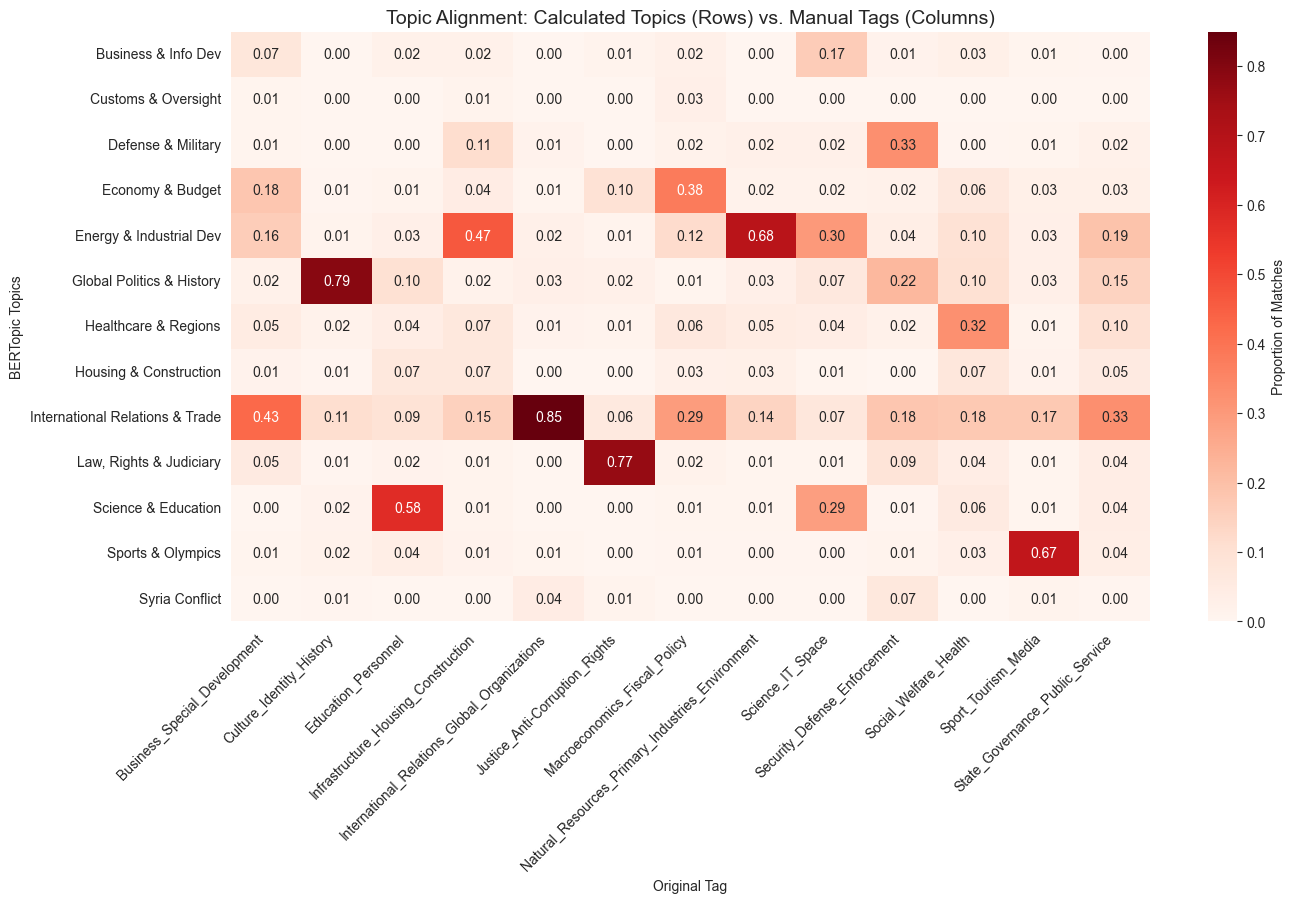

In [3]:
plt.figure(figsize=(14, 10))
df_to_plot = df_compare[df_compare['manual_tag'] != "NaN"]

# Create a Cross-Tabulation (Confusion Matrix)
# Normalize='index' shows percentages: "100% of Topic A maps to Tag B"
matrix = pd.crosstab(
    df_compare['topic_name'],
    df_compare['manual_tag'],
    normalize='columns'
)
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Proportion of Matches'})
plt.title("Topic Alignment: Calculated Topics (Rows) vs. Manual Tags (Columns)", fontsize=14)
plt.ylabel("BERTopic Topics")
plt.xlabel("Original Tag")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

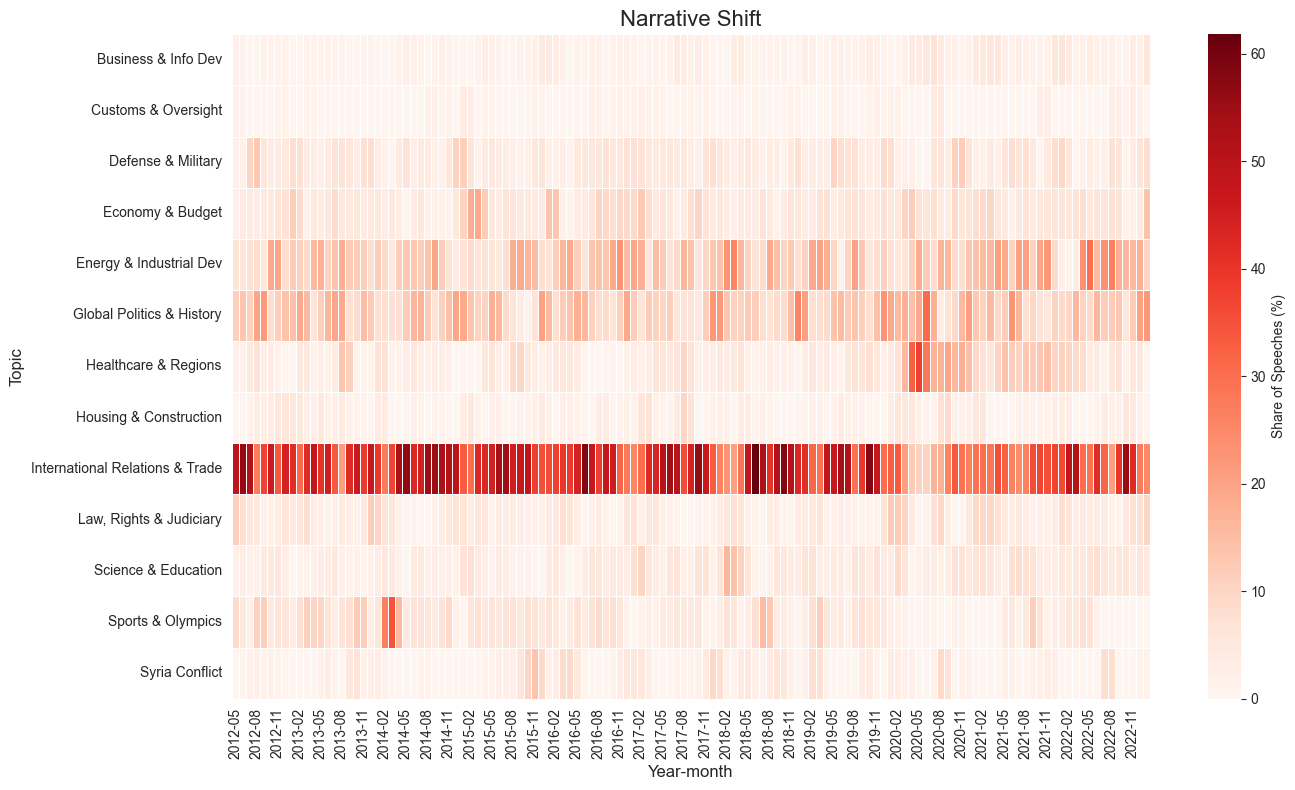

In [4]:
timeline_counts = df.groupby(['year_month', 'topic_name']).size().unstack(fill_value=0)
timeline_pct = timeline_counts.div(timeline_counts.sum(axis=1), axis=0) * 100
timeline_pct_smooth = timeline_pct.rolling(window=2, min_periods=1).mean()

plt.figure(figsize=(14, 8))
sns.heatmap(
    timeline_pct_smooth.T,
    cmap="Reds",    # Yellow to Red colormap (Red = Hot/Frequent)
    linewidths=0.5,   # Small gaps between blocks
    annot=False,      # Turn on if you want numbers in blocks
    cbar_kws={'label': 'Share of Speeches (%)'}
)

plt.title("Narrative Shift", fontsize=16)
plt.xlabel("Year-month", fontsize=12)
plt.ylabel("Topic", fontsize=12)

plt.tight_layout()
plt.savefig("topic_heatmap.png")
plt.show()

In [5]:
df_detailed_topic = pd.read_csv("../data/putins_talks_with_detailed_topics")
df_detailed_topic

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist,grouped_tages,found_topic_id,found_topic_keywords,topic_name,detailed_topic_name
0,2012-05-07 12:20:00,[],The ceremony opened with the Russian State Fla...,15224.0,"The Kremlin, Moscow",Vladimir Putin inaugurated as President of Russia,The inauguration ceremony took place in the Gr...,[],"Citizens of Russia, friends, The inauguration ...","['citizen', 'of', 'Russia', ',', 'friend', ','...",[],8,"law, rights, important, court, society","Law, Rights & Judiciary","Law, Rights & Judiciary"
1,2012-05-08 16:00:00,[],State Duma deputies approved Dmitry Medvedev a...,15266.0,Moscow,State Duma plenary session,Vladimir Putin presented the candidacy of Dmit...,['Civil service'],"Mr Naryshkin, deputies of the Russian parliame...","['Mr', 'Naryshkin', ',', 'deputy', 'of', 'the'...",['State_Governance_Public_Service'],8,"law, rights, important, court, society","Law, Rights & Judiciary","Law, Rights & Judiciary"
2,2012-05-09 11:00:00,[],"More than 14,000 military servicemen took part...",15271.0,Moscow,Military parade celebrating the 67th anniversa...,Vladimir Putin attended the military parade on...,['Armed Forces'],Citizens of Russia! Veterans! Comrade soldiers...,"['citizen', 'of', 'Russia', '!', 'veteran', '!...",['Security_Defense_Enforcement'],1,"great, important, world, war, friends",Global Politics & History,Global Politics & History
3,2012-05-09 13:00:00,[],* * * President of Russia Vladimir Putin: Vete...,15272.0,NaN,Reception marking the 67th anniversary of vict...,A reception marking the 67th anniversary of vi...,[],"Veterans, colleagues, friends! We all share th...","['veteran', ',', 'colleague', ',', 'friend', '...",[],1,"great, important, world, war, friends",Global Politics & History,Global Politics & History
4,2012-05-10 14:00:00,[],Vladimir Putin thanked the members of the plan...,15282.0,Nizhny Tagil,Visit to Research and Production Corporation U...,"In Nizhny Tagil, Vladimir Putin visited Uralva...",['Regions'],"Good afternoon, I want to thank all of you for...","['good', 'afternoon', ',', 'I', 'want', 'to', ...",['State_Governance_Public_Service'],5,"defence, military, forces, navy, equipment",Defense & Military,Defense & Military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,2023-01-10 13:45:00,[],President of Russia Vladimir Putin: Mr Shaskol...,70336.0,"The Kremlin, Moscow",Meeting with Federal Anti-Monopoly Service Hea...,Vladimir Putin had a working meeting with Head...,['Economy and finance'],"Mr Shaskolsky, the Federal Anti-Monopoly Servi...","['Mr', 'Shaskolsky', ',', 'the', 'Federal', 'A...",['Macroeconomics_Fiscal_Policy'],3,"percent, economy, government, economic, budget",Economy & Budget,Economy & Budget
5075,2023-01-11 15:50:00,[],The meeting was attended by Prime Minister Mik...,70338.0,"Novo-Ogaryovo, Moscow Region",Meeting with Government members,The President held a videoconference meeting w...,"['Construction industry', 'Economy and finance...","Good afternoon, colleagues, We are holding the...","['good', 'afternoon', ',', 'colleague', ',', '...","['Infrastructure_Housing_Construction', 'Macro...",0,"cooperation, relations, economic, countries, t...",International Relations & Trade,National Development & Policy
5076,2023-01-12 00:00:00,[],President of Russia Vladimir Putin: Comrade of...,70341.0,NaN,Congratulations on Prosecutor's Office Workers...,The President congratulated current staff and ...,['Fight against crime'],"Comrade officers, veterans, Congratulations on...","['comrade', 'officer', ',', 'veteran', ',', 'c...",['Security_Defense_Enforcement'],8,"law, rights, important, court, society","Law, Rights & Judiciary","Law, Rights & Judiciary"
5077,2023-01-13 12:55:00,[],President of Russia Vladimir Putin: Mr Khabiro...,70347.0,Ufa,Meeting with Head of Bashkortostan Radiy Khabirov,The President had a meeting with Head of the R...,['Regions'],"Mr Khabirov, good afternoon. Let me

In [6]:
df_detailed_topic['date'] = pd.to_datetime(df_detailed_topic['date'])
df_detailed_topic['year'] = df_detailed_topic['date'].dt.year
df_detailed_topic['year_month'] = df_detailed_topic['date'].dt.to_period('M')

df_compare_detailed = df_detailed_topic.copy()
df_compare_detailed['manual_tag'] = df_compare_detailed['grouped_tages'].apply(parse_tags)
df_compare_detailed = df_compare_detailed.explode('manual_tag')
df_compare_detailed

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist,grouped_tages,found_topic_id,found_topic_keywords,topic_name,detailed_topic_name,year,year_month,manual_tag
0,2012-05-07 12:20:00,[],The ceremony opened with the Russian State Fla...,15224.0,"The Kremlin, Moscow",Vladimir Putin inaugurated as President of Russia,The inauguration ceremony took place in the Gr...,[],"Citizens of Russia, friends, The inauguration ...","['citizen', 'of', 'Russia', ',', 'friend', ','...",[],8,"law, rights, important, court, society","Law, Rights & Judiciary","Law, Rights & Judiciary",2012,2012-05,NaN
1,2012-05-08 16:00:00,[],State Duma deputies approved Dmitry Medvedev a...,15266.0,Moscow,State Duma plenary session,Vladimir Putin presented the candidacy of Dmit...,['Civil service'],"Mr Naryshkin, deputies of the Russian parliame...","['Mr', 'Naryshkin', ',', 'deputy', 'of', 'the'...",['State_Governance_Public_Service'],8,"law, rights, important, court, society","Law, Rights & Judiciary","Law, Rights & Judiciary",2012,2012-05,State_Governance_Public_Service
2,2012-05-09 11:00:00,[],"More than 14,000 military servicemen took part...",15271.0,Moscow,Military parade celebrating the 67th anniversa...,Vladimir Putin attended the military parade on...,['Armed Forces'],Citizens of Russia! Veterans! Comrade soldiers...,"['citizen', 'of', 'Russia', '!', 'veteran', '!...",['Security_Defense_Enforcement'],1,"great, important, world, war, friends",Global Politics & History,Global Politics & History,2012,2012-05,Security_Defense_Enforcement
3,2012-05-09 13:00:00,[],* * * President of Russia Vladimir Putin: Vete...,15272.0,NaN,Reception marking the 67th anniversary of vict...,A reception marking the 67th anniversary of vi...,[],"Veterans, colleagues, friends! We all share th...","['veteran', ',', 'colleague', ',', 'friend', '...",[],1,"great, important, world, war, friends",Global Politics & History,Global Politics & History,2012,2012-05,NaN
4,2012-05-10 14:00:00,[],Vladimir Putin thanked the members of the plan...,15282.0,Nizhny Tagil,Visit to Research and Production Corporation U...,"In Nizhny Tagil, Vladimir Putin visited Uralva...",['Regions'],"Good afternoon, I want to thank all of you for...","['good', 'afternoon', ',', 'I', 'want', 'to', ...",['State_Governance_Public_Service'],5,"defence, military, forces, navy, equipment",Defense & Military,Defense & Military,2012,2012-05,State_Governance_Public_Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,2023-01-11 15:50:00,[],The meeting was attended by Prime Minister Mik...,70338.0,"Novo-Ogaryovo, Moscow Region",Meeting with Government members,The President held a videoconference meeting w...,"['Construction industry', 'Economy and finance...","Good afternoon, colleagues, We are holding the...","['good', 'afternoon', ',', 'colleague', ',', '...","['Infrastructure_Housing_Construction', 'Macro...",0,"cooperation, relations, economic, countries, t...",International Relations & Trade,National Development & Policy,2023,2023-01,Infrastructure_Housing_Construction
5076,2023-01-12 00:00:00,[],President of Russia Vladimir Putin: Comrade of...,70341.0,NaN,Congratulations on Prosecutor's Office Workers...,The President congratulated current staff and ...,['Fight against crime'],"Comrade officers, veterans, Congratulations on...","['comrade', 'officer', ',', 'veteran', ',', 'c...",['Security_Defense_Enforcement'],8,"law, rights, important, court, society","Law, Rights & Judiciary","Law, Rights & Judiciary",2023,2023-01,Security_Defense_Enforcement
5077,2023-01-13 12:55:00,[],President of Russia Vladimir Putin: Mr Khabiro...,70347.0,Ufa,Meeting with Head of Bashkortostan Radiy Khabirov,The President had a meeting with Head of the R...,['Regions'],"Mr Khabirov, good afternoon. Let me start by s...","['Mr', 'Khabirov', ',', 'good', 'afternoon', '...",['State_Governance_Public_Service'],0,"cooperation, relations, economic, countries, t...",

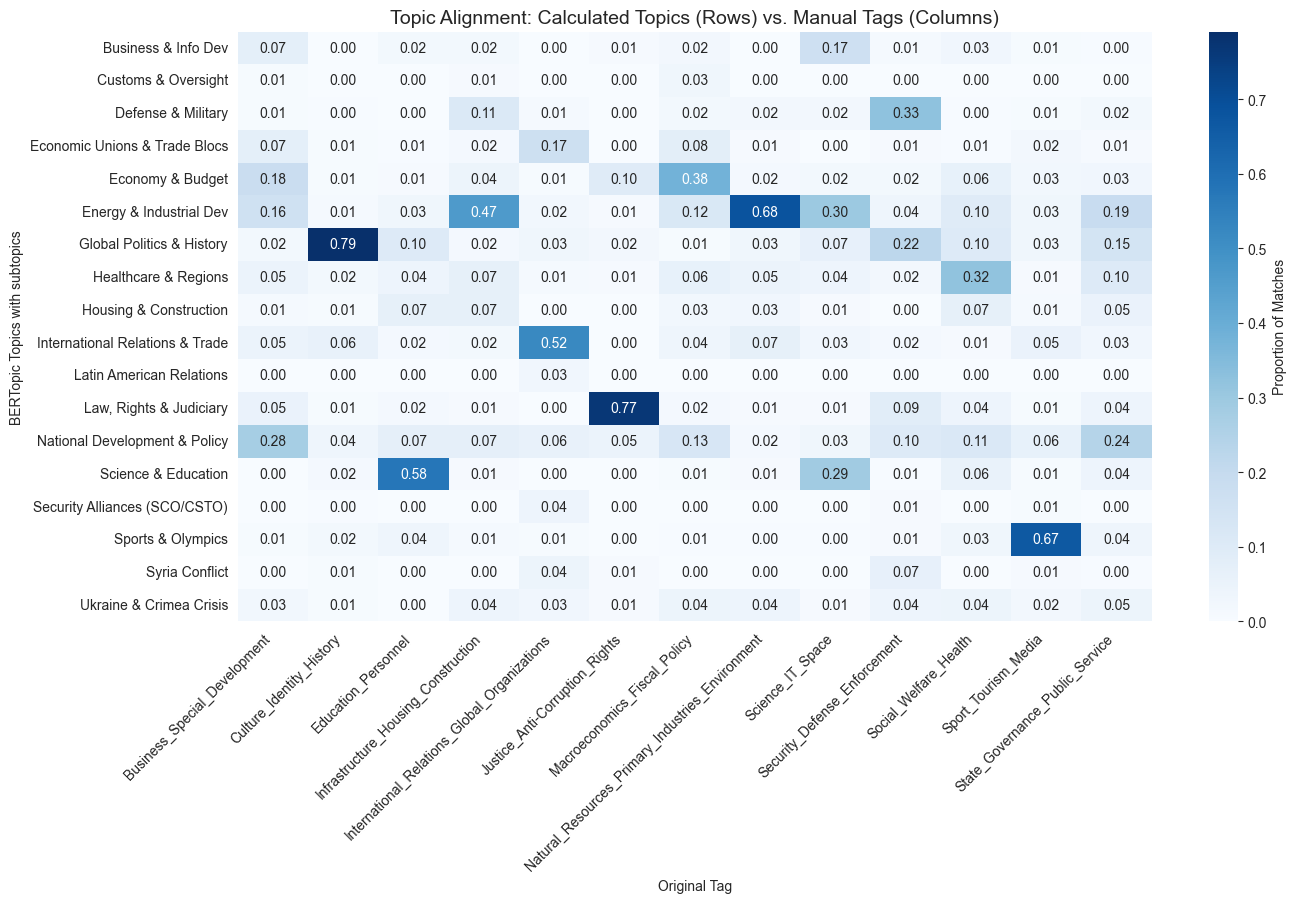

In [7]:
plt.figure(figsize=(14, 10))
df_to_plot_detailed = df_compare_detailed[df_compare_detailed['manual_tag'] != "NaN"]

# Create a Cross-Tabulation (Confusion Matrix)
# Normalize='index' shows percentages: "100% of Topic A maps to Tag B"
matrix_detailed = pd.crosstab(
    df_to_plot_detailed['detailed_topic_name'],
    df_to_plot_detailed['manual_tag'],
    normalize='columns'
)
sns.heatmap(matrix_detailed, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Proportion of Matches'})
plt.title("Topic Alignment: Calculated Topics (Rows) vs. Manual Tags (Columns)", fontsize=14)
plt.ylabel("BERTopic Topics with subtopics")
plt.xlabel("Original Tag")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

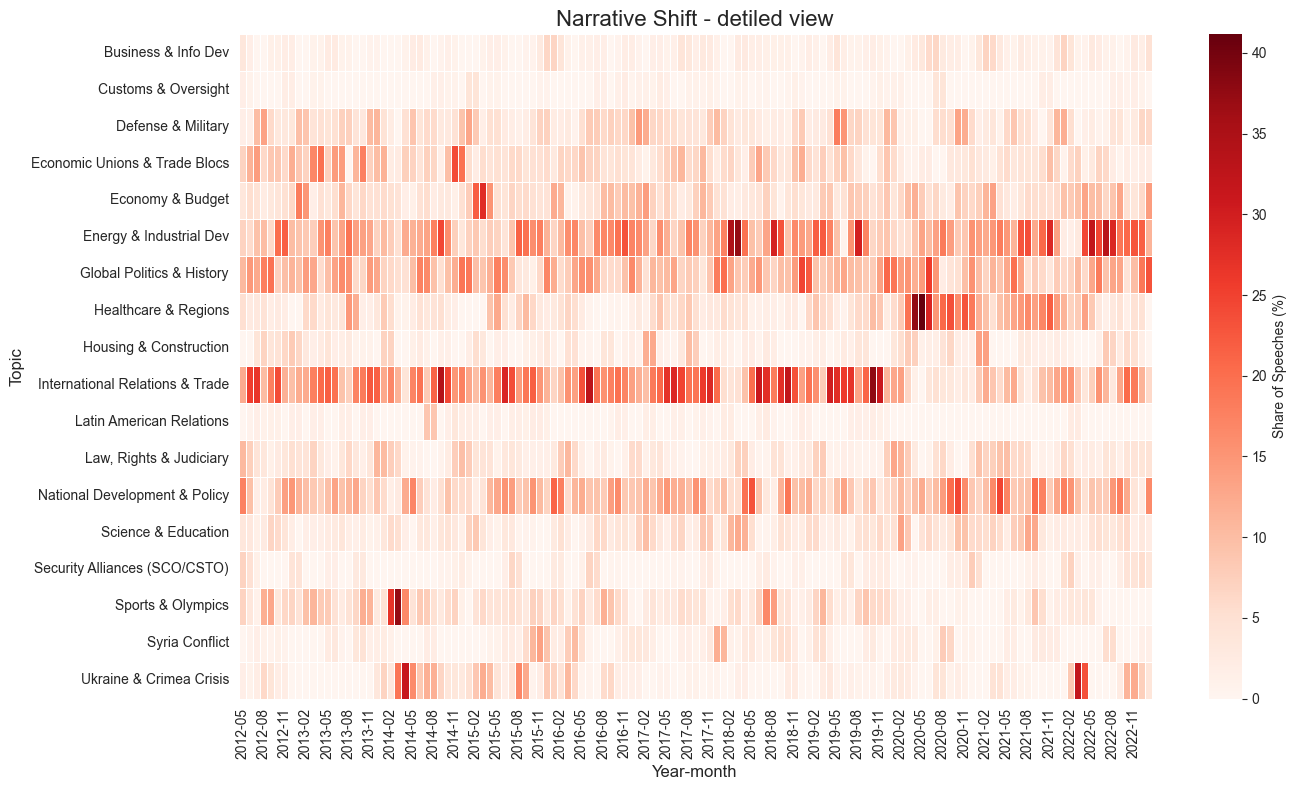

In [9]:
timeline_counts_detailed = df_compare_detailed.groupby(['year_month', 'detailed_topic_name']).size().unstack(fill_value=0)
timeline_pct_detailed = timeline_counts_detailed.div(timeline_counts_detailed.sum(axis=1), axis=0) * 100
timeline_pct_smooth = timeline_pct_detailed.rolling(window=2, min_periods=1).mean()

plt.figure(figsize=(14, 8))
sns.heatmap(
    timeline_pct_smooth.T,
    cmap="Reds",    # Yellow to Red colormap (Red = Hot/Frequent)
    linewidths=0.5,   # Small gaps between blocks
    annot=False,      # Turn on if you want numbers in blocks
    cbar_kws={'label': 'Share of Speeches (%)'}
)

plt.title("Narrative Shift - detiled view", fontsize=16)
plt.xlabel("Year-month", fontsize=12)
plt.ylabel("Topic", fontsize=12)

plt.tight_layout()
plt.savefig("topic_heatmap.png")
plt.show()